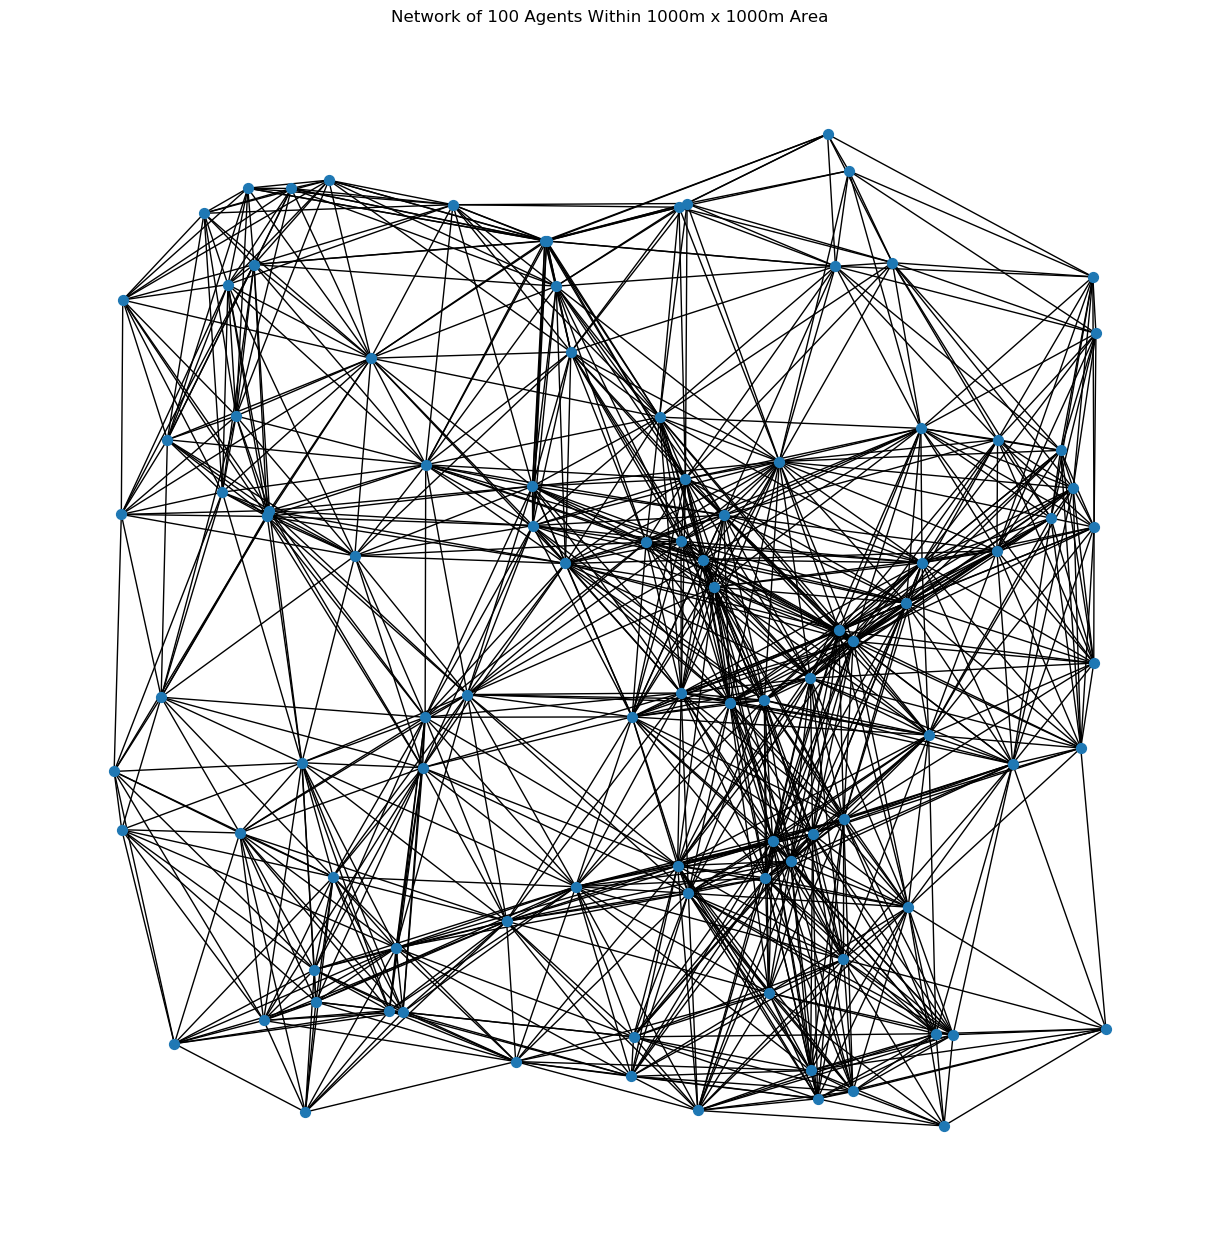

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

np.random.seed(0)

# random positions for 100 agents within a 1000m x 1000m area
positions = {i: (np.random.uniform(0, 1000), np.random.uniform(0, 1000)) for i in range(100)}

# empty graph
G = nx.Graph()

# nodes
for i, pos in positions.items():
    G.add_node(i, pos=pos)

# add edges between nodes that are within 300m of each other
for i in range(100):
    for j in range(i+1, 100):
        if np.linalg.norm(np.array(positions[i]) - np.array(positions[j])) <= 300:
            # the distance will be the weight
            distance = np.linalg.norm(np.array(positions[i]) - np.array(positions[j]))
            G.add_edge(i, j, weight=distance)

plt.figure(figsize=(12, 12))
nx.draw(G, pos=positions, node_size=50, with_labels=False)
plt.title('Network of 100 Agents Within 1000m x 1000m Area')
plt.show()

In [5]:
L = nx.laplacian_matrix(G).toarray()

<class 'networkx.utils.decorators.argmap'> compilation 4:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [8]:
L.shape
np.save("paper_graph", L)